# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [1]:
install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)


  There is a binary version available but the source version is later:
        binary source needs_compilation
kohonen 3.0.10 3.0.11              TRUE

  Binaries will be installed
package 'kohonen' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\56994\AppData\Local\Temp\RtmpyKgBe3\downloaded_packages


Warning message:
"package 'kohonen' was built under R version 3.6.3"

[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

In [8]:
help(som)

[[1]]
           V1         V2         V3         V4          V5         V6
V1  0.4735791  0.5363888  0.5380554  0.4419539  0.12056713  0.5491087
V2 -0.2783502 -0.2994168 -0.3502858 -0.1587444 -0.91311153 -0.6862604
V3 -1.0163141 -0.9993874 -0.8947513 -1.0598642  0.86870070 -0.6225211
V4  1.4758077  1.4512618  1.4134520  1.3863584 -0.06901048  1.4217569



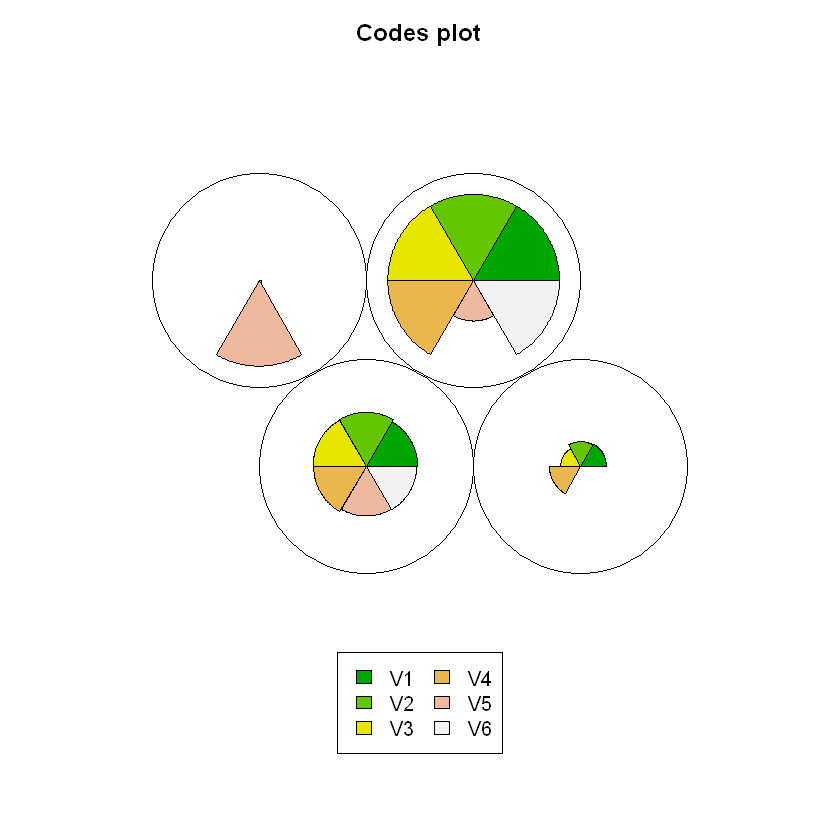

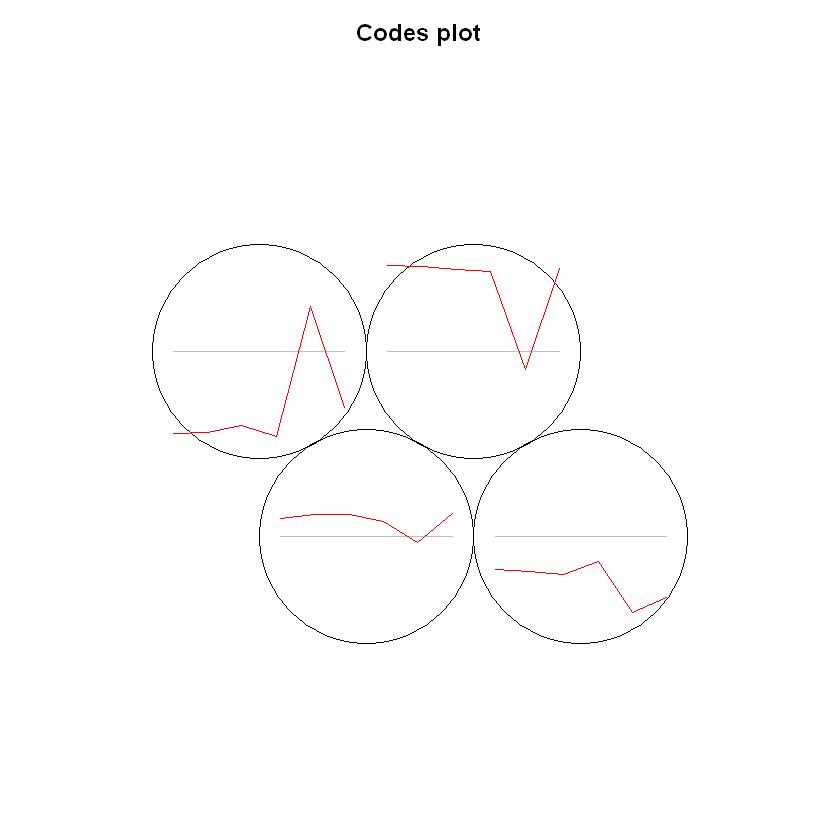

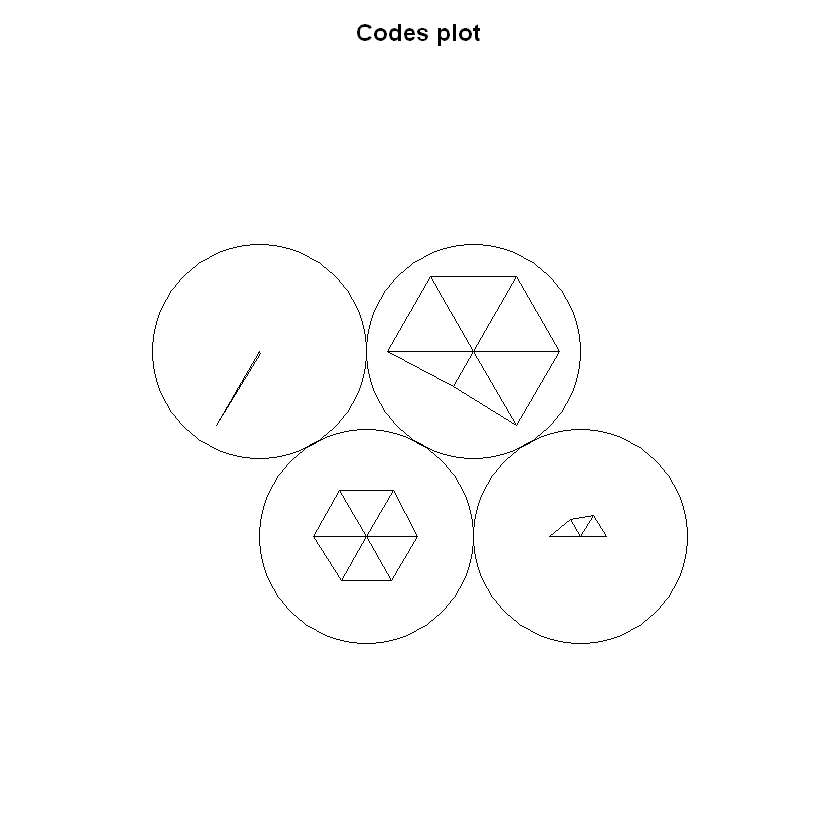

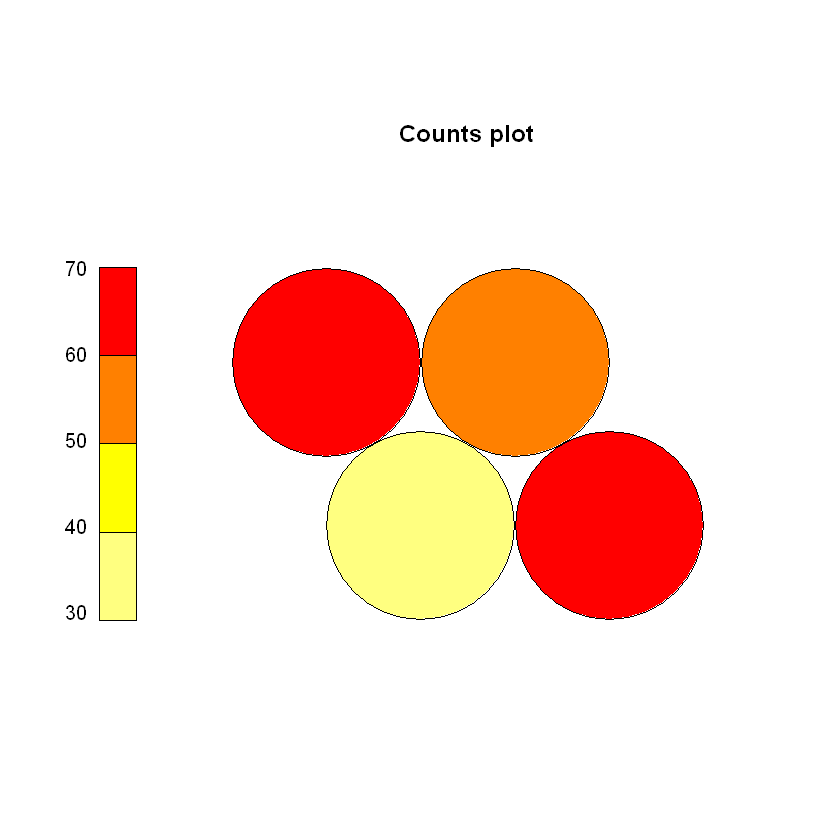

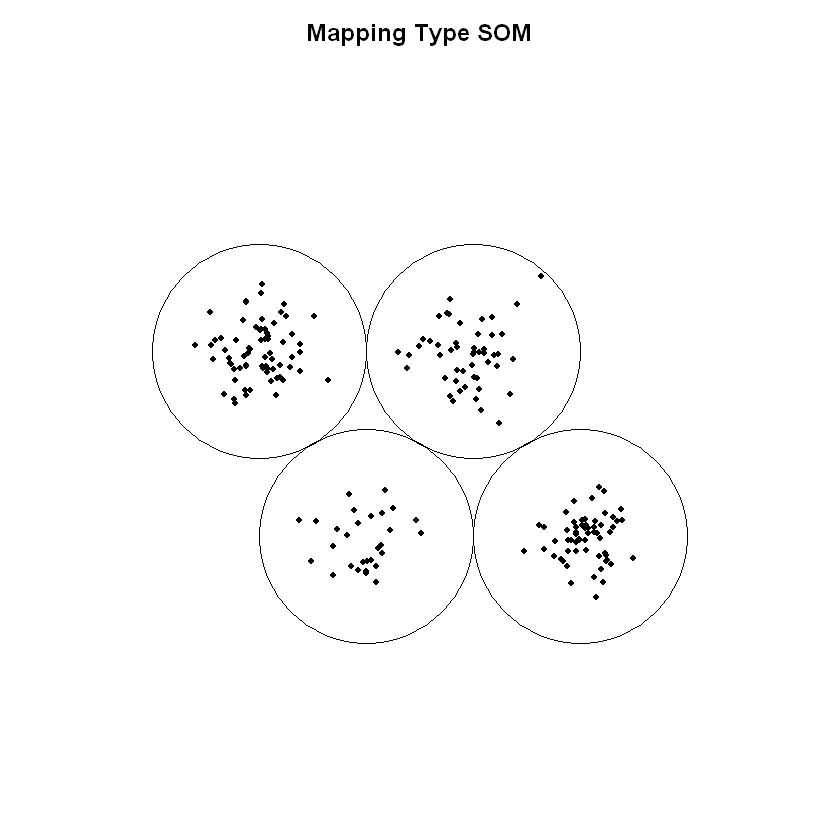

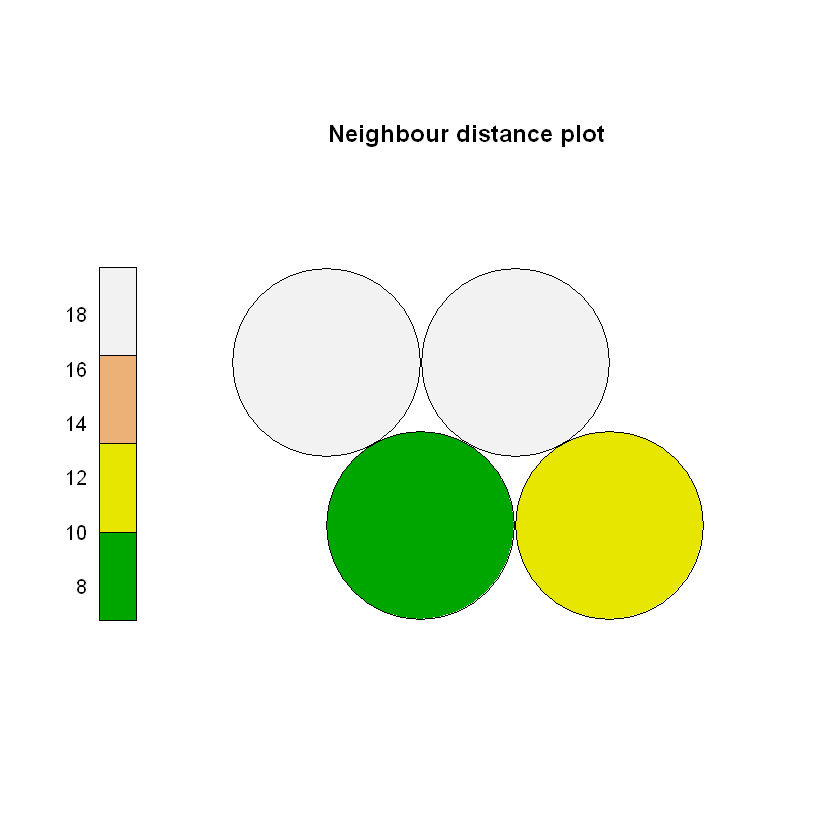

In [5]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

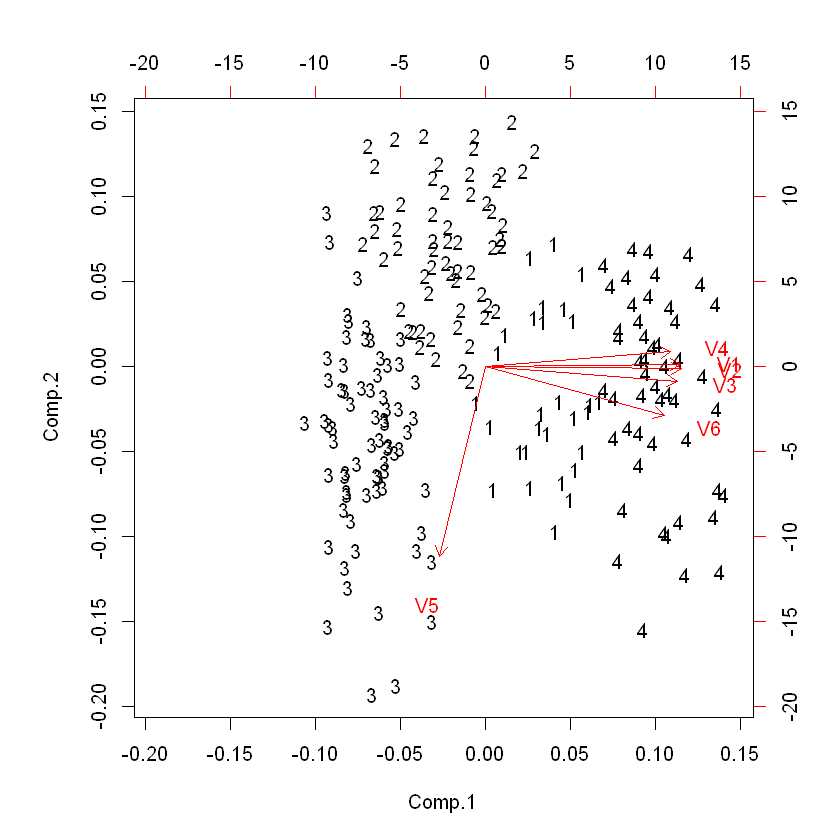

In [10]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Proponga una estrategia gráfica para representarlos.